In [ ]:
!python -m pip install --upgrade pip

In [ ]:
!pip install wordcloud
!pip install certifi --ignore-installed

In [ ]:
!pip install jieba

In [ ]:
!pip install googletrans

In [ ]:
!mkdir jieba_data

In [ ]:
!wget https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big -o jieba_data/dict.txt.big

In [ ]:
# jieba.set_dictionary('jieba_data/dict.txt.big')

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
import time

In [3]:
import googletrans

In [4]:
from pprint import pprint

In [5]:
pprint(googletrans.LANGCODES) 

{'afrikaans': 'af',
 'albanian': 'sq',
 'amharic': 'am',
 'arabic': 'ar',
 'armenian': 'hy',
 'azerbaijani': 'az',
 'basque': 'eu',
 'belarusian': 'be',
 'bengali': 'bn',
 'bosnian': 'bs',
 'bulgarian': 'bg',
 'catalan': 'ca',
 'cebuano': 'ceb',
 'chichewa': 'ny',
 'chinese (simplified)': 'zh-cn',
 'chinese (traditional)': 'zh-tw',
 'corsican': 'co',
 'croatian': 'hr',
 'czech': 'cs',
 'danish': 'da',
 'dutch': 'nl',
 'english': 'en',
 'esperanto': 'eo',
 'estonian': 'et',
 'filipino': 'tl',
 'finnish': 'fi',
 'french': 'fr',
 'frisian': 'fy',
 'galician': 'gl',
 'georgian': 'ka',
 'german': 'de',
 'greek': 'el',
 'gujarati': 'gu',
 'haitian creole': 'ht',
 'hausa': 'ha',
 'hawaiian': 'haw',
 'hebrew': 'he',
 'hindi': 'hi',
 'hmong': 'hmn',
 'hungarian': 'hu',
 'icelandic': 'is',
 'igbo': 'ig',
 'indonesian': 'id',
 'irish': 'ga',
 'italian': 'it',
 'japanese': 'ja',
 'javanese': 'jw',
 'kannada': 'kn',
 'kazakh': 'kk',
 'khmer': 'km',
 'korean': 'ko',
 'kurdish (kurmanji)': 'ku',
 'ky

In [5]:
import random

In [6]:
from wordcloud import WordCloud

In [7]:
import matplotlib.pyplot as plt

In [8]:
from PIL import Image

In [9]:
%matplotlib inline

In [10]:
import pymongo

In [11]:
import pandas as pd

In [12]:
import jieba

In [13]:
import re

In [14]:
import numpy as np

In [15]:
from collections import Counter

In [16]:
client = pymongo.MongoClient('192.168.158.128', 27017)

In [17]:
db = client.tibame

In [18]:
collection = db.recipe_raw

In [19]:
queryArgs = {}
projectField = {'_id' : True, 'url' : True, 'author' : True, 'ingredient' : True, 'steps' : True, 'category' : True}
search_response = db.recipe_raw.find(queryArgs, projection=projectField)

recipe_list = []
for item in search_response[:2000]:
    recipe_list.append(item)
re

In [45]:
data = pd.DataFrame(list(collection.find()))
data

_id  \
0      5f58abb2226b5c697d13c9ad   
1      5f58abbd226b5c697d13c9ae   
2      5f58abc9226b5c697d13c9af   
3      5f58abd6226b5c697d13c9b0   
4      5f58abe3226b5c697d13c9b1   
...                         ...   
58387  5f5d02028d34caa18ae078b3   
58388  5f5d02028d34caa18ae078b4   
58389  5f5d02028d34caa18ae078b5   
58390  5f5d02028d34caa18ae078b6   
58391  5f5d02028d34caa18ae078b7   

                                                     url  \
0      https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1358...   
1      https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1354...   
2      https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1351...   
3      https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1232...   
4      https://cookpad.com/tw/%E9%A3%9F%E8%AD%9C/1205...   
...                                                  ...   
58387                     https://icook.tw/recipes/16113   
58388                     https://icook.tw/recipes/15507   
58389                     https://icook.tw/recipes/15080   
58390                     https://icook.tw/recipes/15063   
58391                     https://icook.tw/recipes/15062   

                        title               time           author  \
0                    健身人 雞胸肉丼  2020年09月06日 10:29             Fish   
1                      健身人的餐點  2020年09月01日 13:57            兒子的媽媽   
2                       健身人餐點  2020年08月28日 13:46            兒子的媽媽   
3          健身餐盤 - 奶油香蒜雞胸肉佐馬鈴薯  2020年04月29日 09:53         Holly Lu   
4               低醣健身料理-雞胸肉捲蔬菜  2020年04月10日 12:06  Wonda‘s｜窮遊女子的灶咖   
...                       ...                ...              ...   
58387        ㄚ曼達的廚房~紙包鮭魚(氣炸鍋)         2015-09-26      I LOVE COOK   
58388                  九層塔炒蛤礪         2015-09-26      I LOVE COOK   
58389                  破布子蒸鱈魚         2015-09-26      I LOVE COOK   
58390         ♥我的手作料理♥ 泰式檸檬蒸魚         2015-09-26      I LOVE COOK   
58391  品靚上菜-萬用沾醬(蔬菜肉海鮮連水餃都搭啦)         2015-09-26      I LOVE COOK   

                                              ingredient  \
0        橄欖油,雞胸肉 適量,紅蘿蔔,高麗菜,全蛋,喜歡的深綠色蔬菜,調味料：黑胡椒、黑豆醬油、料酒,   
1                     雞肉200g,嫩豆腐一盒,白飯適量,青菜適量,鹽巴 白胡椒粉 雞粉,   
2                  雞蛋 x 1,雞胸肉 200 g,雪白菇 適量,空心菜 適量,洋蔥 適量,   
3      雞胸肉1包(2.5條肉),小馬鈴薯4顆,紅蘿蔔1小條,奶油適量,蒜頭6顆,胡椒鹽適量,鹽巴適...   
4           半付 雞胸肉,小黃瓜 1/3 根,紅蘿蔔 1/3 根,鹽 少許,黑胡椒 少許,油 少許,   
...                                                  ...   
58387  绞猪肉300g\n\n300g,鲜虾150g\n\n150g,鸡蛋\n\n1,盐1茶匙\n\...   
58388  绞猪肉300g\n\n300g,鲜虾150g\n\n150g,鸡蛋\n\n1,盐1茶匙\n\...   
58389  绞猪肉300g\n\n300g,鲜虾150g\n\n150g,鸡蛋\n\n1,盐1茶匙\n\...   
58390  绞猪肉300g\n\n300g,鲜虾150g\n\n150g,鸡蛋\n\n1,盐1茶匙\n\...   
58391  绞猪肉300g\n\n300g,鲜虾150g\n\n150g,鸡蛋\n\n1,盐1茶匙\n\...   

                                                   steps  \
0      雞胸肉切丁（好入口的大小）|雞胸肉煎至兩面金黃 盛出備用|橄欖油低溫炒出紅蘿蔔素|加入高麗菜...   
1      先將雞肉剁碎 加入豆腐 及調味料攪拌|煮一鍋水燙青菜|鍋子放油。將攪拌好的豆腐雞肉 用成圓圓...   
2      雞胸肉-切丁 熱鍋先炒洋蔥在下雞肉，用一點醬油調味|熱鍋炒空心菜和雪白菇 ，用一點鹽巴調味|...   
3      雞胸肉完全退冰切成小塊，撒適量胡椒鹽、蒜頭、鹽巴、肉桂粉、羅勒葉，醃漬15分鐘以上|馬鈴薯及...   
4      ｜備料｜\n1. 把小黃瓜、紅蘿蔔切成條狀\n（可先燙過，加快等下煎的速度）\n2. 雞胸肉...   
...                                                  ...   
58387  1、将虾肉剁碎，放入绞猪肉，鸡蛋，盐，味精和胡椒粉，搅拌均匀成云吞馅。\n\n2、将馅料裹进...   
58388  1、将虾肉剁碎，放入绞猪肉，鸡蛋，盐，味精和胡椒粉，搅拌均匀成云吞馅。\n\n2、将馅料裹进...   
58389  1、将虾肉剁碎，放入绞猪肉，鸡蛋，盐，味精和胡椒粉，搅拌均匀成云吞馅。\n\n2、将馅料裹进...   
58390  1、将虾肉剁碎，放入绞猪肉，鸡蛋，盐，味精和胡椒粉，搅拌均匀成云吞馅。\n\n2、将馅料裹进...   
58391  1、将虾肉剁碎，放入绞猪肉，鸡蛋，盐，味精和胡椒粉，搅拌均匀成云吞馅。\n\n2、将馅料裹进...   

                                                 comment category  
0                                                 #今天吃這道       健身  
1                                             健身也是要吃飽飽的喔       健身  
2                                                              健身  
3              減醣、健身族看過來，懶人料理上菜囉🥰 #金廚獎 #健身 #雞胸肉 #馬鈴薯 #減醣       健身  
4      煎雞胸肉吃膩了，突然想到來試試看包蔬菜，但其實有點小失敗，跟大家分享做這道料理時要特別注意的...       健身  
...                                                  ...      ...  
58387                                      \n雲吞配合麵  一流\n       海鮮  
58388                                      \n雲吞配合麵  一流\n       海鮮  
583

In [ ]:
pd_ing = data['ingredient']

In [43]:
list_ing = []
for i in data['ingredient']:
    list_ing.append(i)
list_ing

['橄欖油,雞胸肉 適量,紅蘿蔔,高麗菜,全蛋,喜歡的深綠色蔬菜,調味料：黑胡椒、黑豆醬油、料酒,',
 '雞肉200g,嫩豆腐一盒,白飯適量,青菜適量,鹽巴 白胡椒粉 雞粉,',
 '雞蛋 x 1,雞胸肉 200 g,雪白菇 適量,空心菜 適量,洋蔥 適量,',
 '雞胸肉1包(2.5條肉),小馬鈴薯4顆,紅蘿蔔1小條,奶油適量,蒜頭6顆,胡椒鹽適量,鹽巴適量,肉桂粉適量,羅勒葉適量,',
 '半付 雞胸肉,小黃瓜 1/3 根,紅蘿蔔 1/3 根,鹽 少許,黑胡椒 少許,油 少許,',
 '雞胸肉 半付,紅蘿蔔 半根,菜脯 一大匙,雞蛋 兩顆,鹽巴 少許,白胡椒粉 少許,牛奶 約一匙,',
 '蛋白糊,蛋白 4 顆,鹽巴1咪咪,赤藻醣 60 克,檸檬汁 5 克,蛋黃糊,蛋黃 4 顆,高蛋白粉50克,巧克力95% 100 克,椰子油 50 克,可可粉 15 克,動鮮 60 克,吋烤模 1個 6,',
 '西洋芹3片,雞里肌肉一盤,紅蘿蔔半根,小馬鈴薯兩顆,',
 '雞胸肉片1盤,蒜頭3瓣切末,小牛番茄2個,小杏鮑菇2支,鹽巴適量,芹菜末少許,羅勒香料少許,',
 '虱目魚柳1盤,雞蛋1顆,少許麵粉,胡椒鹽適量,',
 '雞胸肉兩片,起司一把,胡椒鹽,紅蔥頭兩顆,',
 '雞胸肉2塊（需完全退冰）,珍珠馬鈴薯4-6顆,四季豆一把,洋蔥半顆,里肌培根一份,橄欖油,起司絲適量,胡椒鹽,鮮蒜末一把,迷迭香香料,蒜粉,紅椒粉,',
 '一盤雞胸,一把糯米椒,一顆馬鈴薯,紅椒粉少許,鹽巴少許,迷迭香少許,',
 '酪梨 1 顆,半熟雞蛋 1 顆,柚香檸檬沙拉醬 些許,黑胡椒 些許,迷迭香 些許,麵包/吐司,',
 '雞胸肉 200 克,嫩豆腐 1/2 盒,牛番茄 1 顆,無糖豆漿 500 cc,味噌 70 克,海帶芽 少許,蔥末 適量,白胡椒粉 適量,',
 '雞胸肉 1附,鹽巴 些許,黑胡椒 些許,',
 '預備食材,蛋 一個,全麥冷凍鬆餅 一個,莎莎醬 一大匙,橄欖油 適量,',
 '絲瓜 1 條,大陸妹 1 份,花椰菜 適量,雞胸肉 1/2附,鴻禧菇 1 包,木耳 適量,調味料 適量,蝦米、乾香菇 適量,五穀米 3/4 杯,',
 '雞蛋4-5顆 (小顆的蛋請用5顆，第5顆取蛋白就好),希臘優格2大匙,鹽 適量,胡椒 適量,手做藜麥吐司 4 片,',
 '食材,高麗菜 1

In [47]:
list_step = []
for i in data['steps']:
    list_step.append(i)
list_step

['雞胸肉切丁（好入口的大小）|雞胸肉煎至兩面金黃 盛出備用|橄欖油低溫炒出紅蘿蔔素|加入高麗菜拌炒至喜歡的硬度|加入調味料小火滾一分鐘|加入雞胸肉拌炒|將料理放到煮熟的五穀飯上|鋪上炒蛋 蔬菜|完成！|',
 '先將雞肉剁碎 加入豆腐 及調味料攪拌|煮一鍋水燙青菜|鍋子放油。將攪拌好的豆腐雞肉 用成圓圓的 下鍋後慢慢壓扁。煎到兩面金黃色 即可|擺盤。完工！|',
 '雞胸肉-切丁 熱鍋先炒洋蔥在下雞肉，用一點醬油調味|熱鍋炒空心菜和雪白菇 ，用一點鹽巴調味|熱鍋炒雞蛋，用一點雞粉調味|擺盤，完工！|',
 '雞胸肉完全退冰切成小塊，撒適量胡椒鹽、蒜頭、鹽巴、肉桂粉、羅勒葉，醃漬15分鐘以上|馬鈴薯及紅蘿蔔切塊，1杯水用電鍋蒸熟|食材放上奶油，補撒少許鹽巴。120度預熱烤箱10分鐘，接著再送入烤箱以150度烤25分鐘。|註：奶油是增添風味，放的量就看個人喜好|',
 '｜備料｜\n1. 把小黃瓜、紅蘿蔔切成條狀\n（可先燙過，加快等下煎的速度）\n2. 雞胸肉切成薄片，再切成條狀\n（這裏要切的越薄越好，待會才會比較好包，不然會很容易散開！圖片中有些我都切的太厚了TAT請以比圖片中的薄為目標）|在雞胸肉上抹鹽醃一下，此舉除了可以讓它有味道，也可以讓它煎起來比較嫩喔！（醃5-10分鐘即可）|依照雞胸肉的大小包入適量的小黃瓜和紅蘿蔔（可讓頭尾露出，顏色比較漂亮）|捲起\n［註］：圖片中間兩個的厚度是比較恰當的，最左兩塊明顯太厚（錯誤示範）|將肉捲下鍋煎熟（油可以比圖片中的再少一點）|蓋上鍋蓋煎比較容易熟，一面煎個3-4分鐘後開蓋，翻面再煎2-3分鐘即可。|因為肉切太厚很多個肉捲都散開了⋯大家要記得切薄一點！鹽醃法讓雞胸肉不乾柴，搭配小黃瓜更多汁～～|',
 '｜備料｜\n1. 紅蘿蔔切丁\n2. 雞胸肉切丁\n3. 菜脯可先泡水，避免太鹹|起油鍋，先炒紅蘿蔔，再接著加入瀝乾的菜脯|加入雞胸肉略為拌炒後，起鍋前加入少許白胡椒粉|炒至雞胸肉半熟（如圖）即可起鍋|準備另一個碗，打入兩顆蛋，加少許鹽巴拌勻|加入牛奶攪拌均勻|倒入剛剛的雞胸肉蔬菜中|放入電鍋，外鍋加一杯水，蒸至跳起再悶10分鐘即可。（蒸蛋時電鍋鍋蓋可留空隙，避免蒸氣流入蒸蛋表面。此舉可以讓蒸蛋更平滑！）|成果好看又好吃！裡面的蔬菜也可換成玉米等其他蔬菜喔～～|',
 '將鮮奶油 椰子油，可可粉，放入鍋中中小火加熱

# Data Merge

In [23]:
list_ing_merge = ''.join(str(list_ing[:2000]))
print(type(list_ing_merge))
list_ing_merge

<class 'str'>


"['橄欖油,雞胸肉 適量,紅蘿蔔,高麗菜,全蛋,喜歡的深綠色蔬菜,調味料：黑胡椒、黑豆醬油、料酒,', '雞肉200g,嫩豆腐一盒,白飯適量,青菜適量,鹽巴 白胡椒粉 雞粉,', '雞蛋 x 1,雞胸肉 200 g,雪白菇 適量,空心菜 適量,洋蔥 適量,', '雞胸肉1包(2.5條肉),小馬鈴薯4顆,紅蘿蔔1小條,奶油適量,蒜頭6顆,胡椒鹽適量,鹽巴適量,肉桂粉適量,羅勒葉適量,', '半付 雞胸肉,小黃瓜 1/3 根,紅蘿蔔 1/3 根,鹽 少許,黑胡椒 少許,油 少許,', '雞胸肉 半付,紅蘿蔔 半根,菜脯 一大匙,雞蛋 兩顆,鹽巴 少許,白胡椒粉 少許,牛奶 約一匙,', '蛋白糊,蛋白 4 顆,鹽巴1咪咪,赤藻醣 60 克,檸檬汁 5 克,蛋黃糊,蛋黃 4 顆,高蛋白粉50克,巧克力95% 100 克,椰子油 50 克,可可粉 15 克,動鮮 60 克,吋烤模 1個 6,', '西洋芹3片,雞里肌肉一盤,紅蘿蔔半根,小馬鈴薯兩顆,', '雞胸肉片1盤,蒜頭3瓣切末,小牛番茄2個,小杏鮑菇2支,鹽巴適量,芹菜末少許,羅勒香料少許,', '虱目魚柳1盤,雞蛋1顆,少許麵粉,胡椒鹽適量,', '雞胸肉兩片,起司一把,胡椒鹽,紅蔥頭兩顆,', '雞胸肉2塊（需完全退冰）,珍珠馬鈴薯4-6顆,四季豆一把,洋蔥半顆,里肌培根一份,橄欖油,起司絲適量,胡椒鹽,鮮蒜末一把,迷迭香香料,蒜粉,紅椒粉,', '一盤雞胸,一把糯米椒,一顆馬鈴薯,紅椒粉少許,鹽巴少許,迷迭香少許,', '酪梨 1 顆,半熟雞蛋 1 顆,柚香檸檬沙拉醬 些許,黑胡椒 些許,迷迭香 些許,麵包/吐司,', '雞胸肉 200 克,嫩豆腐 1/2 盒,牛番茄 1 顆,無糖豆漿 500 cc,味噌 70 克,海帶芽 少許,蔥末 適量,白胡椒粉 適量,', '雞胸肉 1附,鹽巴 些許,黑胡椒 些許,', '預備食材,蛋 一個,全麥冷凍鬆餅 一個,莎莎醬 一大匙,橄欖油 適量,', '絲瓜 1 條,大陸妹 1 份,花椰菜 適量,雞胸肉 1/2附,鴻禧菇 1 包,木耳 適量,調味料 適量,蝦米、乾香菇 適量,五穀米 3/4 杯,', '雞蛋4-5顆 (小顆的蛋請用5顆，第5顆取蛋白就好),希臘優格2大匙,鹽 適量,胡椒 適量,手做藜麥吐司 4 片,', '食材,高麗菜 1/4 顆,花椰菜 1/2 顆,紅籮蔔

In [54]:
list_steps_merge = ''.join(str(list_step[:2000]))
print(type(list_steps_merge))
list_steps_merge

<class 'str'>


'[\'雞胸肉切丁（好入口的大小）|雞胸肉煎至兩面金黃 盛出備用|橄欖油低溫炒出紅蘿蔔素|加入高麗菜拌炒至喜歡的硬度|加入調味料小火滾一分鐘|加入雞胸肉拌炒|將料理放到煮熟的五穀飯上|鋪上炒蛋 蔬菜|完成！|\', \'先將雞肉剁碎 加入豆腐 及調味料攪拌|煮一鍋水燙青菜|鍋子放油。將攪拌好的豆腐雞肉 用成圓圓的 下鍋後慢慢壓扁。煎到兩面金黃色 即可|擺盤。完工！|\', \'雞胸肉-切丁 熱鍋先炒洋蔥在下雞肉，用一點醬油調味|熱鍋炒空心菜和雪白菇 ，用一點鹽巴調味|熱鍋炒雞蛋，用一點雞粉調味|擺盤，完工！|\', \'雞胸肉完全退冰切成小塊，撒適量胡椒鹽、蒜頭、鹽巴、肉桂粉、羅勒葉，醃漬15分鐘以上|馬鈴薯及紅蘿蔔切塊，1杯水用電鍋蒸熟|食材放上奶油，補撒少許鹽巴。120度預熱烤箱10分鐘，接著再送入烤箱以150度烤25分鐘。|註：奶油是增添風味，放的量就看個人喜好|\', \'｜備料｜\\n1. 把小黃瓜、紅蘿蔔切成條狀\\n（可先燙過，加快等下煎的速度）\\n2. 雞胸肉切成薄片，再切成條狀\\n（這裏要切的越薄越好，待會才會比較好包，不然會很容易散開！圖片中有些我都切的太厚了TAT請以比圖片中的薄為目標）|在雞胸肉上抹鹽醃一下，此舉除了可以讓它有味道，也可以讓它煎起來比較嫩喔！（醃5-10分鐘即可）|依照雞胸肉的大小包入適量的小黃瓜和紅蘿蔔（可讓頭尾露出，顏色比較漂亮）|捲起\\n［註］：圖片中間兩個的厚度是比較恰當的，最左兩塊明顯太厚（錯誤示範）|將肉捲下鍋煎熟（油可以比圖片中的再少一點）|蓋上鍋蓋煎比較容易熟，一面煎個3-4分鐘後開蓋，翻面再煎2-3分鐘即可。|因為肉切太厚很多個肉捲都散開了⋯大家要記得切薄一點！鹽醃法讓雞胸肉不乾柴，搭配小黃瓜更多汁～～|\', \'｜備料｜\\n1. 紅蘿蔔切丁\\n2. 雞胸肉切丁\\n3. 菜脯可先泡水，避免太鹹|起油鍋，先炒紅蘿蔔，再接著加入瀝乾的菜脯|加入雞胸肉略為拌炒後，起鍋前加入少許白胡椒粉|炒至雞胸肉半熟（如圖）即可起鍋|準備另一個碗，打入兩顆蛋，加少許鹽巴拌勻|加入牛奶攪拌均勻|倒入剛剛的雞胸肉蔬菜中|放入電鍋，外鍋加一杯水，蒸至跳起再悶10分鐘即可。（蒸蛋時電鍋鍋蓋可留空隙，避免蒸氣流入蒸蛋表面。此舉可以讓蒸蛋更平滑！）|成果好看又好吃！裡面的蔬菜也可換成玉米等其他蔬菜喔～～|\', \'將鮮奶油 椰

In [56]:
list_merge = list_ing_merge +','+list_steps_merge
list_merge

'[\'橄欖油,雞胸肉 適量,紅蘿蔔,高麗菜,全蛋,喜歡的深綠色蔬菜,調味料：黑胡椒、黑豆醬油、料酒,\', \'雞肉200g,嫩豆腐一盒,白飯適量,青菜適量,鹽巴 白胡椒粉 雞粉,\', \'雞蛋 x 1,雞胸肉 200 g,雪白菇 適量,空心菜 適量,洋蔥 適量,\', \'雞胸肉1包(2.5條肉),小馬鈴薯4顆,紅蘿蔔1小條,奶油適量,蒜頭6顆,胡椒鹽適量,鹽巴適量,肉桂粉適量,羅勒葉適量,\', \'半付 雞胸肉,小黃瓜 1/3 根,紅蘿蔔 1/3 根,鹽 少許,黑胡椒 少許,油 少許,\', \'雞胸肉 半付,紅蘿蔔 半根,菜脯 一大匙,雞蛋 兩顆,鹽巴 少許,白胡椒粉 少許,牛奶 約一匙,\', \'蛋白糊,蛋白 4 顆,鹽巴1咪咪,赤藻醣 60 克,檸檬汁 5 克,蛋黃糊,蛋黃 4 顆,高蛋白粉50克,巧克力95% 100 克,椰子油 50 克,可可粉 15 克,動鮮 60 克,吋烤模 1個 6,\', \'西洋芹3片,雞里肌肉一盤,紅蘿蔔半根,小馬鈴薯兩顆,\', \'雞胸肉片1盤,蒜頭3瓣切末,小牛番茄2個,小杏鮑菇2支,鹽巴適量,芹菜末少許,羅勒香料少許,\', \'虱目魚柳1盤,雞蛋1顆,少許麵粉,胡椒鹽適量,\', \'雞胸肉兩片,起司一把,胡椒鹽,紅蔥頭兩顆,\', \'雞胸肉2塊（需完全退冰）,珍珠馬鈴薯4-6顆,四季豆一把,洋蔥半顆,里肌培根一份,橄欖油,起司絲適量,胡椒鹽,鮮蒜末一把,迷迭香香料,蒜粉,紅椒粉,\', \'一盤雞胸,一把糯米椒,一顆馬鈴薯,紅椒粉少許,鹽巴少許,迷迭香少許,\', \'酪梨 1 顆,半熟雞蛋 1 顆,柚香檸檬沙拉醬 些許,黑胡椒 些許,迷迭香 些許,麵包/吐司,\', \'雞胸肉 200 克,嫩豆腐 1/2 盒,牛番茄 1 顆,無糖豆漿 500 cc,味噌 70 克,海帶芽 少許,蔥末 適量,白胡椒粉 適量,\', \'雞胸肉 1附,鹽巴 些許,黑胡椒 些許,\', \'預備食材,蛋 一個,全麥冷凍鬆餅 一個,莎莎醬 一大匙,橄欖油 適量,\', \'絲瓜 1 條,大陸妹 1 份,花椰菜 適量,雞胸肉 1/2附,鴻禧菇 1 包,木耳 適量,調味料 適量,蝦米、乾香菇 適量,五穀米 3/4 杯,\', \'雞蛋4-5顆 (小顆的蛋請用5顆，第5顆取蛋白就好),希臘優格2大匙,鹽 適量,胡椒 適量,手做藜麥

# 中轉英

In [27]:
translator = googletrans.Translator()

In [28]:
results = translator.translate('我覺得今天天氣很差')
print(results)
print(results.text)

Translated(src=zh-CN, dest=en, text=I think the weather is bad today, pronunciation=None, extra_data="{'translat...")
I think the weather is bad today


In [ ]:
tra_list_ing = []
item = 1
for i in list_ing[:1000]:
    try:
        print(item)
        item += 1
        results = translator.translate(i)
        print(results.text)
        tra_list_ing.append(results.text)
        sleeptime=random.randint(3, 7)
        time.sleep(sleeptime)
        print('睡 %s 秒'%(sleeptime))
    except TypeError:
        pass
with open ('tra_list_ing.txt','w',encoding='utf-8') as t:
    t.write(str(tra_list_ing))
tra_list_ing

In [29]:
f = open ('mydict.txt','r',encoding='utf-8')
first_line = f.readlines()
print(first_line)

['糙米\n', '白米\n', '燕麥\n', '芋頭\n', '蕃薯\n', '玉米\n', '馬鈴薯\n', '薏仁\n', '山藥\n', '豆腐\n', '魚\n', '蝦\n', '雞蛋\n', '雞\n', '豬肉\n', '牛肉\n', '羊肉\n', '鮮乳\n', '低脂乳\n', '牛乳\n', '優酪乳\n', '優格\n', '乳酪\n', '菠菜\n', '高麗菜\n', '白菜\n', '花椰菜\n', '空心菜\n', '黃瓜\n', '蘿蔔\n', '胡蘿蔔\n', '青椒\n', '茄子\n', '菇\n', '海帶\n', '葡萄\n', '草莓\n', '橙\n', '番茄\n', '蘋果\n', '芒果\n', '木瓜\n', '香蕉\n', '芭樂\n', '炒\n', '煎\n', '煮\n', '燉\n', '蒸\n', '滷\n', '烤\n', '烹\n', '拌\n', '涮']


In [30]:
for i in first_line:
    results = translator.translate(i)
    print(results.text)
#         tra_dict.append(results.text)
    with open ('tra_mydict.txt','a',encoding='utf-8') as t:
        t.write(results.text+'\n')

brown rice
White rice
oat
taro
Sweet potato
corn
potato
Job's tears
Yam
tofu
fish
shrimp
egg
Chickens
pork
beef
Lamb
Fresh milk
Low fat milk
milk
Yogurt
Yogurt
cheese
spinach
Cabbage
Chinese cabbage
cauliflower
Water spinach
cucumber
radish
carrot
green pepper
eggplant
mushroom
kelp
grape
Strawberry
Orange
tomato
apple
Mango
papaya
banana
Guava
fry
Fried
cook
stew
steam
halogen
grilled
cooking
mix
rinse


# 資料正規化

In [33]:
rdata = open('tra_list_ing.txt','r',encoding='utf-8')

In [ ]:
list_ing_fix =  re.sub('[*\dWA-Za-z/''\\\\]','',list_ing_merge)
list_ing_fix1 =  re.sub('[*s,⋯⋯⋯⋯⋯⋯⋯⋯]','',list_ing_fix)
list_ing_fix2 =  re.sub('[*｜（）()]','',list_ing_fix1)

In [34]:
first_line = rdata.readline()
second_line = rdata.readline()
print(first_line)
# print(second_line, first_line, sep = "\n")

['Olive oil, chicken breast, right amount, carrot, cabbage, whole egg, favorite dark green vegetables, seasoning: black pepper, black bean soy sauce, cooking wine,', '200g chicken, a box of soft tofu, appropriate amount of white rice, appropriate amount of green vegetables, salt, white pepper powder, chicken powder,', 'Egg x 1, chicken breast 200 g, white mushrooms, water spinach, onions,', '1 packet of chicken breast (2.5 pieces of meat), 4 small potatoes, 1 small strip of carrot, appropriate amount of cream, 6 garlic, appropriate amount of pepper and salt, appropriate amount of salt, appropriate amount of cinnamon, appropriate amount of basil leaves,', 'Half of chicken breast, 1/3 cucumber, 1/3 carrot, a little salt, a little black pepper, a little oil,', 'Half of chicken breast, half of carrot, one tablespoon of dried vegetables, two eggs, a little salt, a little white pepper, about a spoonful of milk,', 'Protein paste, 4 egg whites, 1 mimi salt, 60 g erythritol, 5 g lemon juice, eg

In [35]:
regex_rdata =  re.sub('[\d,]','',first_line)
regex_rdata

'[\'Olive oil chicken breast right amount carrot cabbage whole egg favorite dark green vegetables seasoning: black pepper black bean soy sauce cooking wine\' \'g chicken a box of soft tofu appropriate amount of white rice appropriate amount of green vegetables salt white pepper powder chicken powder\' \'Egg x  chicken breast  g white mushrooms water spinach onions\' \' packet of chicken breast (. pieces of meat)  small potatoes  small strip of carrot appropriate amount of cream  garlic appropriate amount of pepper and salt appropriate amount of salt appropriate amount of cinnamon appropriate amount of basil leaves\' \'Half of chicken breast / cucumber / carrot a little salt a little black pepper a little oil\' \'Half of chicken breast half of carrot one tablespoon of dried vegetables two eggs a little salt a little white pepper about a spoonful of milk\' \'Protein paste  egg whites  mimi salt  g erythritol  g lemon juice egg yolk paste  egg yolks high protein powder  g chocolate %  g c

In [ ]:
list_ing_fix2

In [ ]:
list_ing_fix1

#  斷詞

In [36]:
#En
split_rdata = regex_rdata.split()
split_rdata

["['Olive",
 'oil',
 'chicken',
 'breast',
 'right',
 'amount',
 'carrot',
 'cabbage',
 'whole',
 'egg',
 'favorite',
 'dark',
 'green',
 'vegetables',
 'seasoning:',
 'black',
 'pepper',
 'black',
 'bean',
 'soy',
 'sauce',
 'cooking',
 "wine'",
 "'g",
 'chicken',
 'a',
 'box',
 'of',
 'soft',
 'tofu',
 'appropriate',
 'amount',
 'of',
 'white',
 'rice',
 'appropriate',
 'amount',
 'of',
 'green',
 'vegetables',
 'salt',
 'white',
 'pepper',
 'powder',
 'chicken',
 "powder'",
 "'Egg",
 'x',
 'chicken',
 'breast',
 'g',
 'white',
 'mushrooms',
 'water',
 'spinach',
 "onions'",
 "'",
 'packet',
 'of',
 'chicken',
 'breast',
 '(.',
 'pieces',
 'of',
 'meat)',
 'small',
 'potatoes',
 'small',
 'strip',
 'of',
 'carrot',
 'appropriate',
 'amount',
 'of',
 'cream',
 'garlic',
 'appropriate',
 'amount',
 'of',
 'pepper',
 'and',
 'salt',
 'appropriate',
 'amount',
 'of',
 'salt',
 'appropriate',
 'amount',
 'of',
 'cinnamon',
 'appropriate',
 'amount',
 'of',
 'basil',
 "leaves'",
 "'Half",


In [59]:
# Ch
jieba.load_userdict('./mydict.txt')
split_data = jieba.lcut(list_merge)
split_data

['[',
 "'",
 '橄欖油',
 ',',
 '雞胸',
 '肉',
 ' ',
 '適量',
 ',',
 '紅',
 '蘿蔔',
 ',',
 '高麗菜',
 ',',
 '全蛋',
 ',',
 '喜歡',
 '的',
 '深綠色',
 '蔬菜',
 ',',
 '調味料',
 '：',
 '黑胡椒',
 '、',
 '黑豆',
 '醬油',
 '、',
 '料酒',
 ',',
 "'",
 ',',
 ' ',
 "'",
 '雞肉',
 '200g',
 ',',
 '嫩豆腐',
 '一盒',
 ',',
 '白飯',
 '適量',
 ',',
 '青菜',
 '適量',
 ',',
 '鹽巴',
 ' ',
 '白',
 '胡椒粉',
 ' ',
 '雞粉',
 ',',
 "'",
 ',',
 ' ',
 "'",
 '雞蛋',
 ' ',
 'x',
 ' ',
 '1',
 ',',
 '雞胸',
 '肉',
 ' ',
 '200',
 ' ',
 'g',
 ',',
 '雪白',
 '菇',
 ' ',
 '適量',
 ',',
 '空心菜',
 ' ',
 '適量',
 ',',
 '洋蔥',
 ' ',
 '適量',
 ',',
 "'",
 ',',
 ' ',
 "'",
 '雞胸',
 '肉',
 '1',
 '包',
 '(',
 '2.5',
 '條肉',
 ')',
 ',',
 '小',
 '馬鈴薯',
 '4',
 '顆',
 ',',
 '紅',
 '蘿蔔',
 '1',
 '小條',
 ',',
 '奶油',
 '適量',
 ',',
 '蒜頭',
 '6',
 '顆',
 ',',
 '胡椒',
 '鹽',
 '適量',
 ',',
 '鹽巴',
 '適量',
 ',',
 '肉桂粉',
 '適量',
 ',',
 '羅',
 '勒葉',
 '適量',
 ',',
 "'",
 ',',
 ' ',
 "'",
 '半付',
 ' ',
 '雞胸',
 '肉',
 ',',
 '小',
 '黃瓜',
 ' ',
 '1',
 '/',
 '3',
 ' ',
 '根',
 ',',
 '紅',
 '蘿蔔',
 ' ',
 '1',
 '/',
 '3',
 ' ',
 '根',
 ',',
 '鹽',
 

In [ ]:
ing_words_list = jieba.lcut(list_ing_fix2)

In [ ]:
ing_words_list

# 保留字

In [62]:
# En
with open(file='tra_mydict.txt',mode='r', encoding="UTF-8") as file:
    reserve_dict = file.readlines()
reserve_dict

['brown rice\n',
 'White rice\n',
 'oat\n',
 'taro\n',
 'Sweet potato\n',
 'corn\n',
 'potato\n',
 "Job's tears\n",
 'Yam\n',
 'tofu\n',
 'fish\n',
 'shrimp\n',
 'egg\n',
 'Chickens\n',
 'pork\n',
 'beef\n',
 'Lamb\n',
 'Fresh milk\n',
 'Low fat milk\n',
 'milk\n',
 'Yogurt\n',
 'Yogurt\n',
 'cheese\n',
 'spinach\n',
 'Cabbage\n',
 'Chinese cabbage\n',
 'cauliflower\n',
 'Water spinach\n',
 'cucumber\n',
 'radish\n',
 'carrot\n',
 'green pepper\n',
 'eggplant\n',
 'mushroom\n',
 'kelp\n',
 'grape\n',
 'Strawberry\n',
 'Orange\n',
 'tomato\n',
 'apple\n',
 'Mango\n',
 'papaya\n',
 'banana\n',
 'Guava\n',
 'brown rice\n',
 'White rice\n',
 'oat\n',
 'taro\n',
 'Sweet potato\n',
 'corn\n',
 'potato\n',
 "Job's tears\n",
 'Yam\n',
 'tofu\n',
 'fish\n',
 'shrimp\n',
 'egg\n',
 'Chickens\n',
 'pork\n',
 'beef\n',
 'Lamb\n',
 'Fresh milk\n',
 'Low fat milk\n',
 'milk\n',
 'Yogurt\n',
 'Yogurt\n',
 'cheese\n',
 'spinach\n',
 'Cabbage\n',
 'Chinese cabbage\n',
 'cauliflower\n',
 'Water spinach\

In [64]:
# En
en_reserve_words_list = []
for i in reserve_dict:
    results =  re.sub('[\s]','',i)
    en_reserve_words_list.append(results)
en_reserve_words_list

['brownrice',
 'Whiterice',
 'oat',
 'taro',
 'Sweetpotato',
 'corn',
 'potato',
 "Job'stears",
 'Yam',
 'tofu',
 'fish',
 'shrimp',
 'egg',
 'Chickens',
 'pork',
 'beef',
 'Lamb',
 'Freshmilk',
 'Lowfatmilk',
 'milk',
 'Yogurt',
 'Yogurt',
 'cheese',
 'spinach',
 'Cabbage',
 'Chinesecabbage',
 'cauliflower',
 'Waterspinach',
 'cucumber',
 'radish',
 'carrot',
 'greenpepper',
 'eggplant',
 'mushroom',
 'kelp',
 'grape',
 'Strawberry',
 'Orange',
 'tomato',
 'apple',
 'Mango',
 'papaya',
 'banana',
 'Guava',
 'brownrice',
 'Whiterice',
 'oat',
 'taro',
 'Sweetpotato',
 'corn',
 'potato',
 "Job'stears",
 'Yam',
 'tofu',
 'fish',
 'shrimp',
 'egg',
 'Chickens',
 'pork',
 'beef',
 'Lamb',
 'Freshmilk',
 'Lowfatmilk',
 'milk',
 'Yogurt',
 'Yogurt',
 'cheese',
 'spinach',
 'Cabbage',
 'Chinesecabbage',
 'cauliflower',
 'Waterspinach',
 'cucumber',
 'radish',
 'carrot',
 'greenpepper',
 'eggplant',
 'mushroom',
 'kelp',
 'grape',
 'Strawberry',
 'Orange',
 'tomato',
 'apple',
 'Mango',
 'papa

In [65]:
# Ch
with open(file='mydict.txt',mode='r', encoding="UTF-8") as file:
    ch_reserve_dict = file.readlines()
ch_reserve_dict

['糙米\n',
 '白米\n',
 '燕麥\n',
 '芋頭\n',
 '蕃薯\n',
 '玉米\n',
 '馬鈴薯\n',
 '薏仁\n',
 '山藥\n',
 '豆腐\n',
 '魚\n',
 '蝦\n',
 '蛋\n',
 '雞胸\n',
 '雞腿\n',
 '雞翅\n',
 '豬肉\n',
 '牛肉\n',
 '羊肉\n',
 '鮮乳\n',
 '低脂乳\n',
 '牛乳\n',
 '優酪乳\n',
 '優格\n',
 '乳酪\n',
 '菠菜\n',
 '高麗菜\n',
 '白菜\n',
 '花椰菜\n',
 '空心菜\n',
 '黃瓜\n',
 '蘿蔔\n',
 '胡蘿蔔\n',
 '青椒\n',
 '茄子\n',
 '菇\n',
 '海帶\n',
 '葡萄\n',
 '草莓\n',
 '橙\n',
 '番茄\n',
 '蘋果\n',
 '芒果\n',
 '木瓜\n',
 '香蕉\n',
 '芭樂\n',
 '炒\n',
 '煎\n',
 '煮\n',
 '燉\n',
 '蒸\n',
 '滷\n',
 '烤\n',
 '烹\n',
 '拌\n',
 '涮']

In [67]:
# Ch
ch_reserve_words_list = []
for i in ch_reserve_dict:
    results =  re.sub('[\s]','',i)
    ch_reserve_words_list.append(results)
ch_reserve_words_list

['糙米',
 '白米',
 '燕麥',
 '芋頭',
 '蕃薯',
 '玉米',
 '馬鈴薯',
 '薏仁',
 '山藥',
 '豆腐',
 '魚',
 '蝦',
 '蛋',
 '雞胸',
 '雞腿',
 '雞翅',
 '豬肉',
 '牛肉',
 '羊肉',
 '鮮乳',
 '低脂乳',
 '牛乳',
 '優酪乳',
 '優格',
 '乳酪',
 '菠菜',
 '高麗菜',
 '白菜',
 '花椰菜',
 '空心菜',
 '黃瓜',
 '蘿蔔',
 '胡蘿蔔',
 '青椒',
 '茄子',
 '菇',
 '海帶',
 '葡萄',
 '草莓',
 '橙',
 '番茄',
 '蘋果',
 '芒果',
 '木瓜',
 '香蕉',
 '芭樂',
 '炒',
 '煎',
 '煮',
 '燉',
 '蒸',
 '滷',
 '烤',
 '烹',
 '拌',
 '涮']

# 食譜保留後數據

In [5]:
# En
ing_words_list_reserveword = []
for term in split_rdata:
    if term in re_reserve_words_list:
        ing_words_list_reserveword.append(term)
ing_words_list_reserveword

NameError: name 'split_rdata' is not defined

In [4]:
# En
ing_counter = Counter(ing_words_list_reserveword)
print(type(ing_counter))
ing_counter

NameError: name 'Counter' is not defined

In [3]:
# En lamdba
ing_counter_sort = Counter(sorted(lambda :x ))
ing_counter_sort

NameError: name 'Counter' is not defined

In [69]:
# Ch
ch_ing_words_list_reserveword = []
for term in split_data:
    if term in ch_reserve_words_list:
        ch_ing_words_list_reserveword.append(term)
ch_ing_words_list_reserveword

['雞胸',
 '蘿蔔',
 '高麗菜',
 '雞胸',
 '菇',
 '空心菜',
 '雞胸',
 '馬鈴薯',
 '蘿蔔',
 '雞胸',
 '黃瓜',
 '蘿蔔',
 '雞胸',
 '蘿蔔',
 '蘿蔔',
 '馬鈴薯',
 '雞胸',
 '番茄',
 '雞胸',
 '雞胸',
 '馬鈴薯',
 '雞胸',
 '馬鈴薯',
 '雞胸',
 '番茄',
 '海帶',
 '雞胸',
 '蛋',
 '花椰菜',
 '雞胸',
 '蛋',
 '優格',
 '高麗菜',
 '花椰菜',
 '雞胸',
 '菠菜',
 '馬鈴薯',
 '煎',
 '玉米',
 '番茄',
 '番茄',
 '番茄',
 '雞胸',
 '雞胸',
 '煎',
 '玉米',
 '蘿蔔',
 '番茄',
 '雞腿',
 '蛋',
 '馬鈴薯',
 '雞胸',
 '雞胸',
 '番茄',
 '雞腿',
 '空心菜',
 '花椰菜',
 '牛肉',
 '海帶',
 '蘿蔔',
 '雞胸',
 '豆腐',
 '黃瓜',
 '番茄',
 '海帶',
 '燕麥',
 '優格',
 '香蕉',
 '燕麥',
 '優格',
 '番茄',
 '番茄',
 '高麗菜',
 '白米',
 '高麗菜',
 '牛肉',
 '燕麥',
 '花椰菜',
 '蛋',
 '青椒',
 '青椒',
 '番茄',
 '香蕉',
 '優格',
 '燕麥',
 '香蕉',
 '雞胸',
 '蛋',
 '雞胸',
 '雞胸',
 '雞胸',
 '番茄',
 '番茄',
 '花椰菜',
 '雞胸',
 '豬肉',
 '豬肉',
 '優格',
 '雞胸',
 '白菜',
 '煎',
 '豆腐',
 '高麗菜',
 '蘿蔔',
 '豆腐',
 '菇',
 '白米',
 '雞胸',
 '蘿蔔',
 '玉米',
 '豆腐',
 '海帶',
 '雞胸',
 '豆腐',
 '玉米',
 '花椰菜',
 '煮',
 '蘿蔔',
 '乳酪',
 '雞胸',
 '炒',
 '蘿蔔',
 '豆腐',
 '豬肉',
 '蘿蔔',
 '滷',
 '玉米',
 '番茄',
 '煮',
 '魚',
 '雞胸',
 '蛋',
 '空心菜',
 '蘿蔔',
 '花椰菜',
 '雞胸',
 '菇',
 '滷',
 '滷',
 '菇',
 '雞腿',
 '蘿蔔',
 '高麗菜

In [70]:
#ch
ch_ing_counter = Counter(ch_ing_words_list_reserveword)
print(type(ch_ing_counter))
ch_ing_counter

<class 'collections.Counter'>


Counter({'雞胸': 1584,
         '蘿蔔': 538,
         '高麗菜': 216,
         '菇': 66,
         '空心菜': 30,
         '馬鈴薯': 194,
         '黃瓜': 335,
         '番茄': 390,
         '海帶': 69,
         '蛋': 519,
         '花椰菜': 227,
         '優格': 129,
         '菠菜': 40,
         '煎': 1060,
         '玉米': 208,
         '雞腿': 153,
         '牛肉': 92,
         '豆腐': 2164,
         '燕麥': 92,
         '香蕉': 90,
         '白米': 26,
         '青椒': 75,
         '豬肉': 190,
         '白菜': 34,
         '煮': 1353,
         '乳酪': 100,
         '炒': 1206,
         '滷': 69,
         '魚': 35,
         '拌': 1594,
         '糙米': 33,
         '蘋果': 102,
         '烤': 449,
         '芋頭': 16,
         '蝦': 92,
         '草莓': 19,
         '薏仁': 12,
         '山藥': 29,
         '茄子': 53,
         '胡蘿蔔': 62,
         '葡萄': 6,
         '芒果': 25,
         '雞翅': 21,
         '蒸': 131,
         '芭樂': 1,
         '羊肉': 3,
         '燉': 62,
         '涮': 2,
         '橙': 2,
         '優酪乳': 1})

# 停止字

In [ ]:
stop_words_list = []
with open(file='stop_word.txt',mode='r', encoding="UTF-8") as file:
    for line in file:
        line = line.strip()
        stop_words_list.append(line)
stop_words_list

In [ ]:
ing_words_list = jieba.lcut(list_ing_fix2)
ing_words_list_stopword = []
for term in ing_words_list:
    if term not in stop_words_list:
        ing_words_list_stopword.append(term)
ing_words_list_stopword

In [ ]:
ing_counter = Counter(ing_words_list_stopword)

In [ ]:
ing_counter

In [ ]:
ing_counter_1 = Counter(sorted(ing_words_list))

In [ ]:
ing_counter_1

In [ ]:
with open ('ing_counter.csv','w',encoding='utf-8') as f :
    f.write(str(ing_counter))

# 文字雲

In [72]:
worldcloud = WordCloud(font_path='./fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(ch_ing_counter)

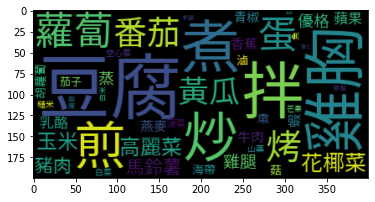

In [73]:
plt.imshow(worldcloud, interpolation='bilinear')

(0.0, 1.0, 0.0, 1.0)

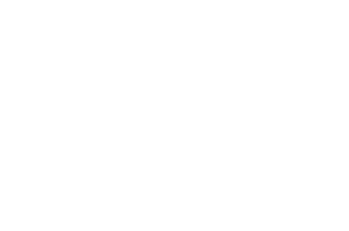

In [74]:
plt.axis('off')

In [75]:
plt.show()